In [2]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [4]:
df = pd.read_csv('weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [5]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [6]:
result = df.groupby(df.Day.dt.year).agg('mean')

print(result)
print('Самый холодный год: ', result.t.index[result.t.argmin()])
print('Самый теплый год: ', result.t.index[result.t.argmax()])

             t
Day           
2008  8.545205
2009  7.610959
2010  7.117808
2011  8.337912
2012  6.980822
2013  8.728767
2014  8.931507
2015  9.079452
2016  7.907104
Самый холодный год:  2012
Самый теплый год:  2015


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [7]:
df_modified = df.loc[(df.t >= 0) & (df.Day.dt.month == 1)]

df_grouped = df_modified.groupby(df.Day.dt.year).count()

print('Ответ: ', df_grouped.t.index[df_grouped.t.argmax()])

Ответ:  2008


**3.** В каком году было самое холодное лето (по средней температуре)

In [8]:
df_modified = df.loc[(df.Day.dt.month == 6) | (df.Day.dt.month == 7) | (df.Day.dt.month == 8)]
df_grouped = df_modified.groupby(df.Day.dt.year).agg('mean')

print('Cамое холодное лето: ', df_grouped.t.index[df_grouped.t.argmin()])

Cамое холодное лето:  2008


**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [23]:
df['difference'] = df['t'] - df['t'].shift(-1)

day_arg = df.difference.abs().argmax()
print('День: ', df.Day[day_arg], ' перепад температуры: ', df.difference[day_arg] )

День:  2014-05-26 00:00:00  перепад температуры:  15.0


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

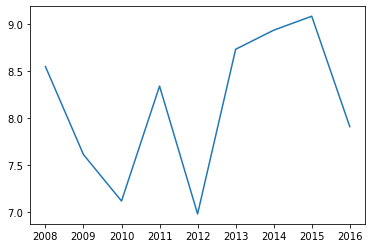

In [44]:
y = df.groupby(df.Day.dt.year).t.agg('mean')

x = y.index.values

plt.plot(x, y, label='график среднегодовых температур')